# Plot power spectra

plot output of scripts/2_compute_spectra.py  
  
created: Jan 23, 2023  
modified: April 5, 2023; Feb 16, 2024  
last modified: Mar 5, 2024

## Set-up

### Imports

In [2]:
# Imports - standard 
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Imports - custom
import sys
sys.path.append('../../code')
from paths import EXTERNAL_PATH
from info import SESSIONS, EPOCH_TIMES
from plots import plot_psd_diff, plot_spectra_2conditions
from utils import comp_psd_diff
from tfr_utils import crop_tfr

In [3]:
# Autoreload
%load_ext autoreload
%autoreload 2

### settings

In [4]:
plt.style.use('../../mpl_styles/default.mplstyle')

### functions

#### examine spectra output for an example file

['spectra_pre', 'spectra_post', 'freq']
Freq shape: (76,)
Pre-stimulus PSD shape: (1024, 76)
Post-stimulus PSD shape: (1024, 76)


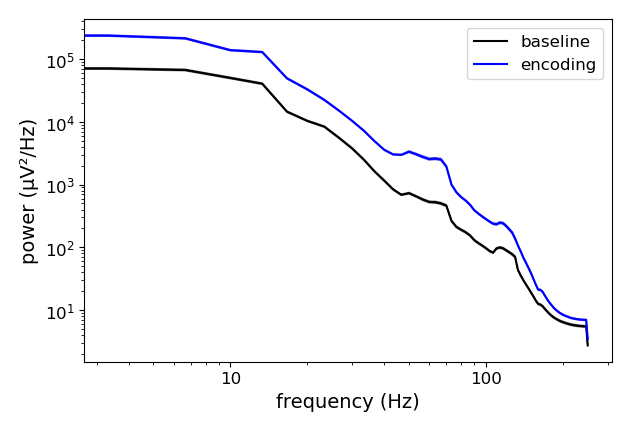

In [8]:
# load example psd and plot

# load and unpack
dir_input = f"{EXTERNAL_PATH}/data/lfp/lfp_spectra"
files = os.listdir(dir_input)
data_in = np.load(f"{dir_input}/{files[2]}")
spectra_pre = data_in['spectra_pre']
spectra_post = data_in['spectra_post']
freq = data_in['freq']

# compute trial average
psd_pre = np.mean(spectra_pre, axis=0)
psd_post = np.mean(spectra_post, axis=0)

# plot
plot_spectra_2conditions(psd_pre, psd_post, freq, shade_sem=True)


# print info
print(data_in.files)
print(f"Freq shape: {freq.shape}")
print(f"Pre-stimulus PSD shape: {psd_pre.shape}")
print(f"Post-stimulus PSD shape: {psd_post.shape}")

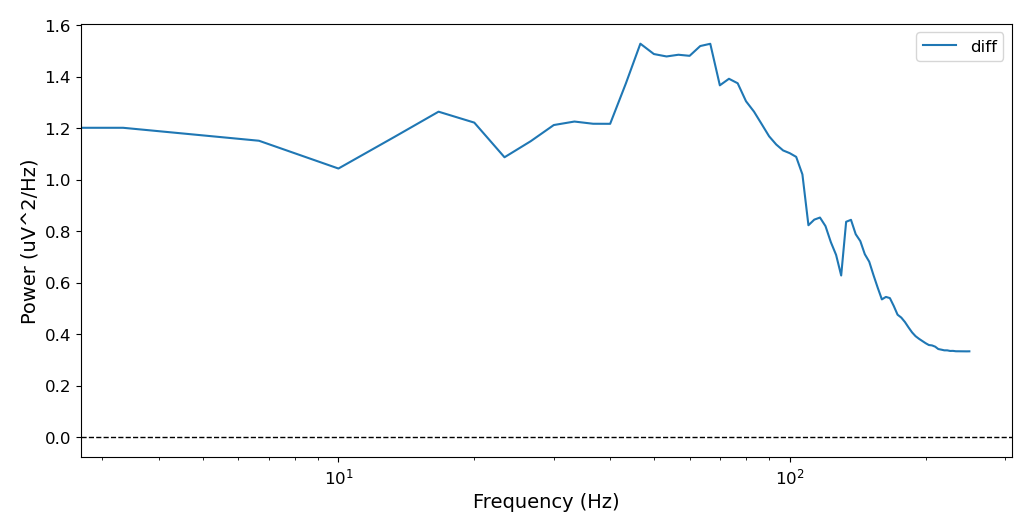

In [9]:
# compute differnce of log psd and plot

# compute log psd
log_psd_pre = np.log(psd_pre)
log_psd_post = np.log(psd_post)

# compute difference
log_psd_diff = log_psd_post - log_psd_pre

# plot log psd
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(freq, np.mean(log_psd_diff, axis=0), label='diff')

# label
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power (uV^2/Hz)')
ax.legend()

# annotate power=0
ax.axhline(0, color='k', linestyle='--', linewidth=1)

# scale x-axis logarithmically
ax.set(xscale="log")

plt.show()

In [8]:
# these have been developed into functions within the modules scripts.utils.py and scripts.plots.py

# def comp_psd_diff(psd_pre, psd_post):
#     """
#     Compute the difference of log psd.
    
#     Parameters
#     ----------
#     psd_pre : array
#         Array of pre-stimulus psd.
#     psd_post : array
#         Array of post-stimulus psd.

#     Returns
#     -------
#     log_psd_diff : array
#         Array of log psd difference.
    
#     """
    
#     # compute log psd
#     log_psd_pre = np.log(psd_pre)
#     log_psd_post = np.log(psd_post)
    
#     # compute difference
#     log_psd_diff = log_psd_post - log_psd_pre

#     return log_psd_diff

# def plot_psd_diff(freq, psd_diff):
#     """ Plot spectra (or spectral difference) in semi-log space."""
#     # plot psd
#     fig, ax = plt.subplots(1, 1, figsize=(10, 5))
#     ax.plot(freq, psd_diff.T, color='grey')

#     # plot mean
#     ax.plot(freq, psd_diff.mean(axis=0), color='k', linewidth=3)

#     # label
#     ax.set_xlabel('Frequency (Hz)')
#     ax.set_ylabel('Power (uV^2/Hz)')
#     ax.set_title(f"Power spectrum difference")

#     # annotate power=0
#     ax.axhline(0, color='r', linestyle='--', linewidth=3)

#     # scale x-axis logarithmically
#     ax.set(xscale="log");

#     return fig, ax

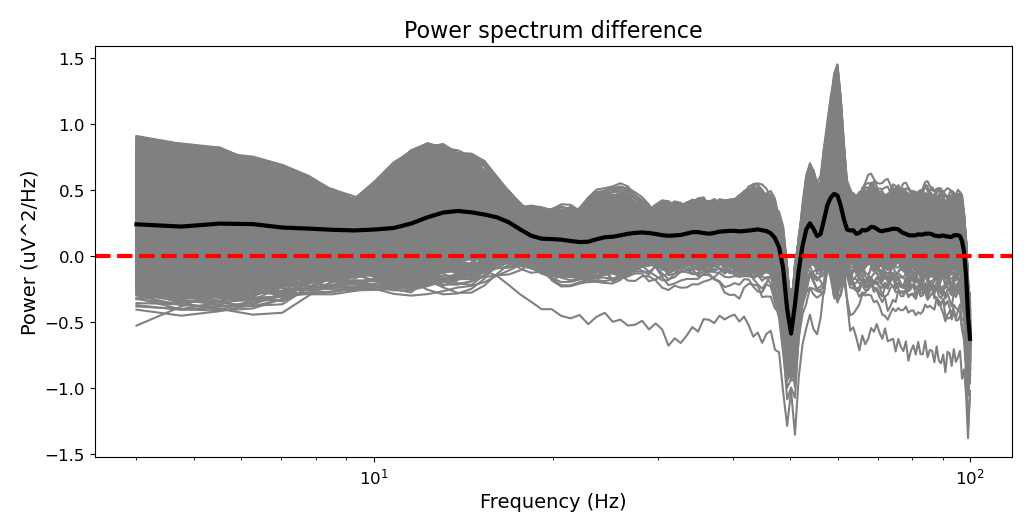

In [19]:
# Test functions on example data - compute and plot log psd difference

# load psd results
dir_input = f"{EXTERNAL_PATH}/data/lfp/lfp_psd"
session = SESSIONS[0]
data_pre = np.load(f"{dir_input}/{session}_lfp_pre.npz")
data_post = np.load(f"{dir_input}/{session}_lfp_post.npz")

# compute log psd difference
psd_diff = comp_psd_diff(data_pre['spectra'], data_post['spectra'])

# plot
plot_psd_diff(data_pre['freq'], psd_diff)


### load results of step2a_compute_spectra.py

In [25]:
# load example spectra

# load and unpack
dir_input = f"{EXTERNAL_PATH}/data/lfp/lfp_spectra"
files = os.listdir(dir_input)
data_in = np.load(f"{dir_input}/{files[1]}")

print(data_in.files)
print(data_in['spectra_pre'].shape)
print(data_in['freq'].shape)

['spectra_pre', 'spectra_post', 'freq']
(170, 1024, 76)
(76,)


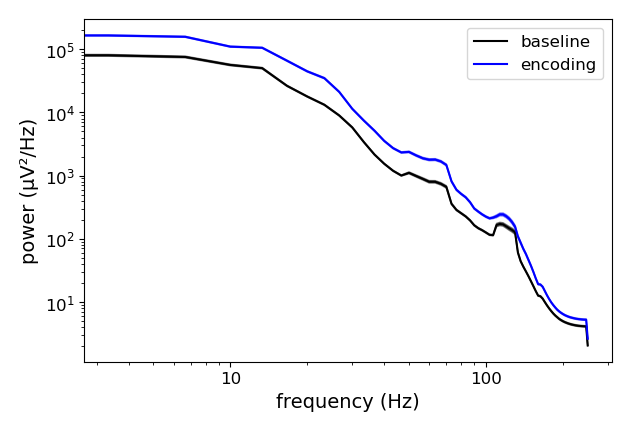

In [26]:
# load example psd and plot

# load and unpack
dir_input = f"{EXTERNAL_PATH}/data/lfp/lfp_spectra"
files = os.listdir(dir_input)
data_in = np.load(f"{dir_input}/{files[0]}")
spectra_pre = data_in['spectra_pre']
spectra_post = data_in['spectra_post']
freq = data_in['freq']

# compute trial average
psd_pre = np.mean(spectra_pre, axis=0)
psd_post = np.mean(spectra_post, axis=0)

# plot
plot_spectra_2conditions(psd_pre, psd_post, freq, shade_sem=True)


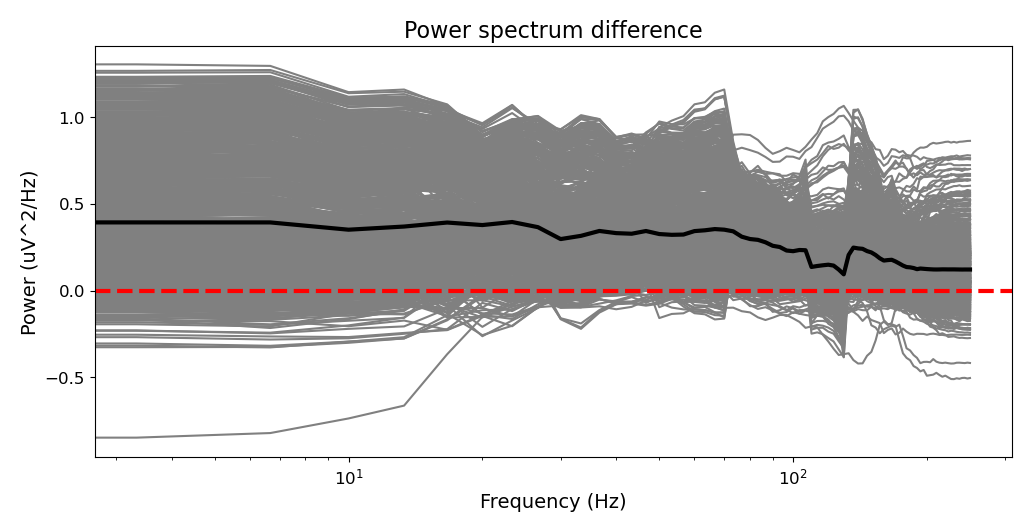

In [27]:
# compute log psd difference
psd_diff = comp_psd_diff(psd_pre, psd_post)

# plot
plot_psd_diff(freq, psd_diff)

### plot spectrogram

In [28]:
# load example spectrogram
dir_input = f"{EXTERNAL_PATH}/data/lfp/lfp_tfr/sessions"
files = os.listdir(dir_input)
data_in = np.load(f"{dir_input}/{files[0]}")
tfr = data_in['spectrogram']
time = data_in['time']
freq = data_in['freq']

In [33]:
from tfr_utils import load_tfr_results, plot_evoked_tfr

Time shape: (500,)
Freq shape: (128,)
TFR shape: (128, 500)


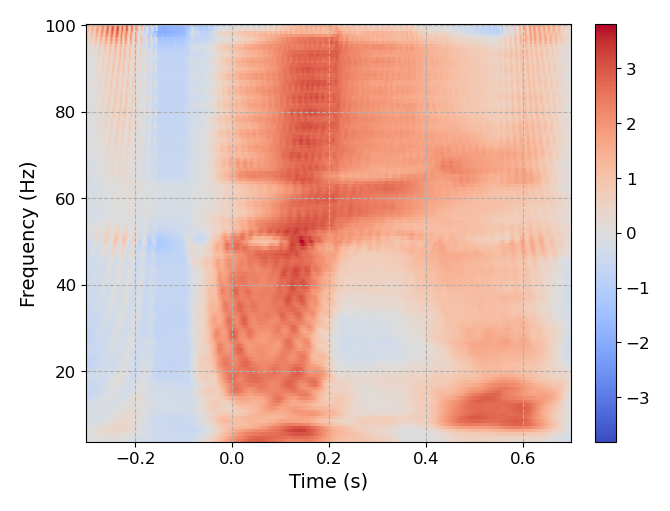

In [44]:
# load example results and plot

# load
time, freq, tfr = load_tfr_results(f"{dir_input}/{files[2]}")
print(f"Time shape: {time.shape}")
print(f"Freq shape: {freq.shape}")
print(f"TFR shape: {tfr.shape}")

# plot
plot_evoked_tfr(tfr, freq, time)
